<a href="https://colab.research.google.com/github/AlexeyTri/MyMachineLearningSeminars/blob/main/seminar1/%D0%9E%D1%81%D0%BD%D0%BE%D0%B2%D0%BD%D1%8B%D0%B5_%D0%BF%D0%BE%D0%BD%D1%8F%D1%82%D0%B8%D1%8F_%D0%BF%D1%80%D0%B8%D0%BC%D0%B5%D1%80%D1%8B_%D0%BF%D1%80%D0%B8%D0%BA%D0%BB%D0%B0%D0%B4%D0%BD%D1%8B%D1%85_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основные понятия и примеры прикладных задач

Загрузка библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
import os

In [2]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    !wget -q -O IRIS.csv https://raw.githubusercontent.com/AlexeyTri/MyMachineLearningSeminars/main/seminar1/iris.csv

In [7]:
!wget -q -O sample_data/iRIS.csv https://raw.githubusercontent.com/AlexeyTri/MyMachineLearningSeminars/main/seminar1/iris.csv

Загрузка выборки - ИРИСЫ ФИШЕРА

In [9]:
dataset = pd.read_csv('/content/sample_data/iRIS.csv')

In [12]:
dataset.sample(5, random_state=42)

,sepal.length,sepal.width,petal.length,petal.width,variety
73,6.1,2.8,4.7,1.2,Versicolor
18,5.7,3.8,1.7,0.3,Setosa
118,7.7,2.6,6.9,2.3,Virginica
78,6.0,2.9,4.5,1.5,Versicolor
76,6.8,2.8,4.8,1.4,Versicolor


In [21]:
np.unique(dataset['variety'])

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

# Работа с данными



1.   проанализировать множество объектов: размер выборки, определить признаки, которыми описываются объекты
2.   определить множество ответов
3.   определить тип задачи машинного обучение (инструмент решения)
4.   определить пайплайн задачи: предобработка данных, структура модели, обучение, контроль качества



## множество объектов:

в данной задаче множество объектов описывается 4 признаки => n=4


1.   длина чашелистика
2.   ширина чашелистика
3.   длина лепестка
4.   ширина лепестка



* все признаки являются вещественными признаками. Формально объекты $Х$ представляются в следующем виде:
\begin{align}
 X \in ℝ ^{l 𝗑 n}
\end{align}

$l$ - число объектов,
$n$ - число признаков,
$X$ - вещественая матрица размера $l 𝗑 n$

In [11]:
print('Размер выборки составляет l={} объектов'.format(len(dataset)))

Размер выборки составляет l=150 объектов


## множество ответов

в данной задаче множество ответов состоит из трех элементов


```
np.unique(dataset['variety'])
array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)
```



## задача машинного обучения

в данном случае, так как мощность множества $|y| =3 << l = 150$ получаем задачу классификации на $M = 3$ класса

## анализ данных

спроектируем все объекты на двумерные плоскости

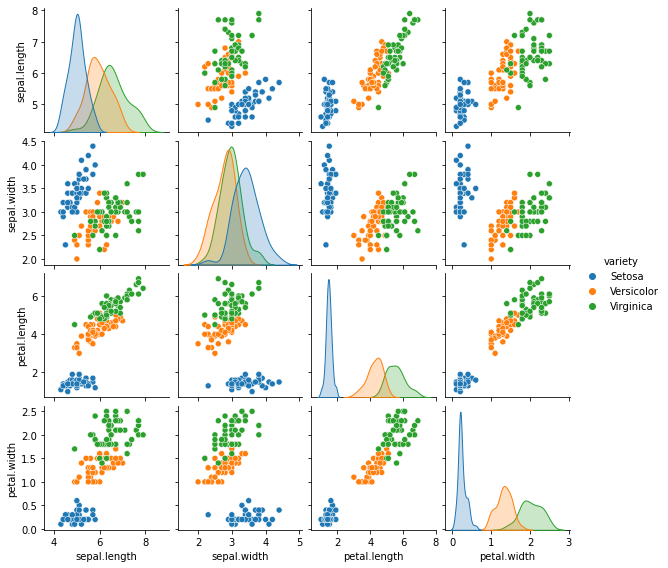

In [24]:
sns.pairplot(dataset, hue='variety', height=2)
plt.show()

класс $Setosa$ существенно отделяется от двух других. При этом множество элементов двух других классов расположены так, что позволяет нам провести разделяющую плоскость

# Построение модели

## предобработка данных

* приведем задачу к задаче бинарной классификации, а менно ярко выраженный класс Setosa
* закодируем классы множеством ${\{-1, +1}\}$

In [26]:
binary_dataset = dataset.drop(index=dataset.index[dataset['variety'] == 'Setosa'])

In [27]:
binary_dataset.loc[dataset['variety'] == 'Versicolor', dataset.columns == 'variety'] = -1
binary_dataset.loc[dataset['variety'] == 'Virginica', dataset.columns == 'variety'] = +1

## модель алгоритмов

* **${𝓕}$**- модель алгоритмов в машинном обучении это множество параметрических функций, которые действуют из множества объектов в множество ответов:

\begin{align}
 {𝓕} = \{ f|f : ℝ ^{n} ⟶ \{-1,+1\}, {ограничения}\}
\end{align}

---



Пример параметрического семейства функций для задач бинайрной классификации - линейный классификатор:
\begin{align}
 {𝓕} = \{ f(θ, x) = sign(θ^{ᵀ} x)|θ\inℝ^{n}\}
\end{align}



* **функция потерь**

ML это всегда выбо функции из множества ${𝓕}$. Критерий выбора функционал ${ℒ}$, который каждой  $f\in {𝓕}$ ставит в соответствие число из $ℝ_{+}$. В общем случае функционал можно представить в следующем виде:
\begin{align}
 {ℒ}(f,X,y) = \sum_{i=1}^l q(f, x_{i}, y_{i})
\end{align}

$q$ - функция ошибки на объекте $x$

${ℒ}$ - эмперический риск


* оптимизационная задача
\begin{align}
    \hat{f}  = argmin_{f\in{𝓕}}{ℒ}(f,X,y)
\end{align}

❗ значение ${\hat{f}}$ зависит от выборки $(X, y)$, то есть на разных наборах данных оптимальныая функция будет разная


функционал качества нашего примера

\begin{align}
 {ℒ}(f,X,y) = \sum_{i=1}^l \left[f(θ, x) \ne y_{i} \right]
\end{align}

оптимизационная задача



\begin{align}
\hat\theta = argmin_{\theta\in{ℝ ^{n}}}\sum_{i=1}^l \left[f(θ, x) \ne y_{i} \right]
\end{align}

**поиск параметра $\hat\theta$ и есть решение оптимизационной задачи, для каждого класса** 



# Решение

## поиск оптимального вектора параметров

* вектор параметров, МАКСИМАЛЬНО разделяющий простарнства признаков обоих классов

1. $X \in ℝ ^{l 𝗑 (n+1)}$, +1 это параметр $w_0$ в уравнении построения плоскости
2. $y \in \{-1,+1\}$ 

In [34]:
X = binary_dataset.iloc[:, binary_dataset.columns != 'variety'].values
y = binary_dataset.iloc[:, binary_dataset.columns == 'variety'].values.reshape(-1)
X = np.array(np.hstack([X, np.ones([len(X), 1])]), dtype=np.float64)
y = np.array(y, dtype=np.float64)

In [ ]:
model = LogisticRegression(random_state=0, max_iter=20)
_ = model.fit(X, y)

In [ ]:
model.predict_proba(X)

In [42]:
model.coef_

array([[-0.43215421, -0.43128572,  2.36090069,  2.6390892 , -0.69452208]])

## перейдем к решению многоклассовой задачи

* LOO - один против всех

### генерация синтетической выборки

In [103]:
np.random.seed(0)
l = 100
n = 2
X1 = np.array([-1, -1]) + 0.5*np.random.randn(l, n)
X2 = np.array([1, 1]) + 0.5*np.random.randn(l, n)
X3 = np.array([-1, 1]) + 0.5*np.random.randn(l, n)

X = np.vstack([X1, X2, X3])
y = np.hstack([[0]*l, [1]*l, [2]*l])

In [124]:
X = np.hstack([X, np.ones([len(X), 1])])

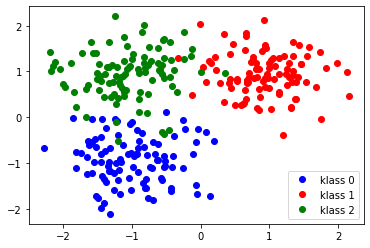

In [126]:
cols = ['blue', 'red', 'green']

for k in np.unique(y):
    plt.plot(X[y==k,0], X[y==k, 1], 'o', label='klass {}'.format(k), color=cols[k])

plt.legend(loc='best')
plt.show()

## ОДИН ПРОТИВ ВСЕХ

данный метод построен на том,что нужно построить $M$ линейных классификаторов, которые классфицируют $k$-й класс против всех остальных классов

In [139]:
models = []
model = LogisticRegression(random_state=0, max_iter=2000)
_ = model.fit(X, np.array(y==0, dtype=np.int64))
models.append(model)

model = LogisticRegression(random_state=0, max_iter=2000)
_ = model.fit(X, np.array(y==1, dtype=np.int64))
models.append(model)

model = LogisticRegression(random_state=0, max_iter=2000)
_ = model.fit(X, np.array(y==2, dtype=np.int64))
models.append(model)

In [140]:
models[0].coef_

array([[-8.11241775e-01, -4.11735152e+00,  2.95360566e-06]])

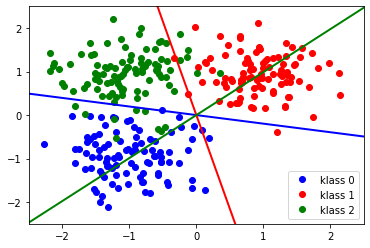

In [128]:
cols = ['blue', 'red', 'green']
plt.xlim((-2.5,2.5))
plt.ylim((-2.5,2.5))

for k in np.unique(y):
    plt.plot(X[y==k,0], X[y==k, 1], 'o', label='klass {}'.format(k), color=cols[k])

for k in np.unique(y):
    x1, y1 = models[k].coef_[0][1]/models[k].coef_[0][0], - 1

    x2, y2 = - models[k].coef_[0][1]/models[k].coef_[0][0], 1

    polinomial = np.poly1d(np.polyfit([x1, x2], [y1, y2],1))
    x_axis = np.linspace(-10, 10)
    y_axis = polinomial(x_axis)
    plt.plot(x_axis, y_axis, linewidth=2, color=cols[k])

plt.legend(loc='best')
plt.show()

In [129]:
def get_line(a, b, c=0, x_min=-10, x_max=10):
    x1, y1 = -(-b + c)/a, -1
    x2, y2 = -(b + c)/a, 1
    
    polynomial = np.poly1d(np.polyfit([x1, x2], [y1, y2], 1))
    x_axis = np.linspace(x_min, x_max)
    y_axis = polynomial(x_axis)
    
    return x_axis, y_axis

In [137]:
models = []
model = LogisticRegression(random_state=0, max_iter=2000, fit_intercept=False)
_ = model.fit(X, np.array(y==0, dtype=np.int64))
models.append(model)

model = LogisticRegression(random_state=0, max_iter=2000, fit_intercept=False)
_ = model.fit(X, np.array(y==1, dtype=np.int64))
models.append(model)

model = LogisticRegression(random_state=0, max_iter=2000, fit_intercept=False)
_ = model.fit(X, np.array(y==2, dtype=np.int64))
models.append(model)

In [138]:
models[0].coef_

array([[-0.74102465, -4.10730758, -0.87947999]])

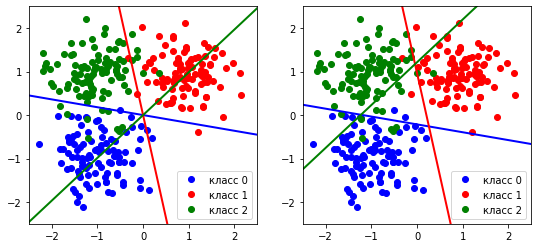

In [132]:
from matplotlib import gridspec
cols = ['blue', 'red', 'green']
fig, gs = plt.figure(figsize=(9,4)), gridspec.GridSpec(1, 2)

ax = []
for i in range(2):
    ax.append(fig.add_subplot(gs[i]))
    ax[i].set_xlim((-2.5, 2.5)), ax[i].set_ylim((-2.5, 2.5))

for k in np.unique(y):
    ax[0].plot(X[y==k,0], X[y==k,1], 'o', 
               label='класс {}'.format(k), color=cols[k])
    ax[1].plot(X[y==k,0], X[y==k,1], 'o', 
               label='класс {}'.format(k), color=cols[k])

for k in np.unique(y):
    ax[0].plot(*get_line(*models[k].coef_[0][:2]), linewidth=2, color=cols[k])
    ax[1].plot(*get_line(*models[k].coef_[0]), linewidth=2, color=cols[k])

ax[0].legend(loc='best'), ax[1].legend(loc='best')
plt.show()